In [75]:
import pandas as pd
import itertools
import numpy as np

In [76]:
jura = pd.read_csv('data/jura.csv')

In [77]:
jura.head()

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn
0,238.6,307.7,3,3,1.740,9.32,38.32,25.72,21.32,77.36,92.56
1,254.4,197.2,2,2,1.335,10.00,40.20,24.76,29.72,77.88,73.56
2,280.7,334.7,2,3,1.610,10.60,47.00,8.88,21.40,30.80,64.80
3,430.8,193.3,3,2,2.150,11.92,43.52,22.70,29.72,56.40,90.00
4,438.3,108.1,3,5,1.565,16.32,38.52,34.32,26.20,66.40,88.40


In [78]:
import matplotlib.pyplot as plt

In [79]:
def locmap(x, y, var):   
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, c=var, s=50)
    plt.colorbar()
    plt.title('Mapa de amostras')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.axis('scaled')
    plt.grid()
    plt.show()

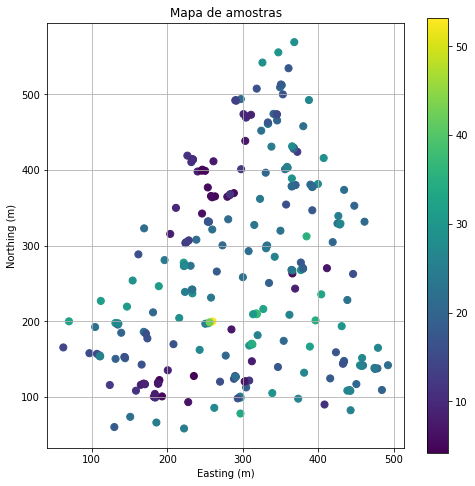

In [80]:
locmap(jura.Xloc, jura.Yloc, jura.Ni)

In [142]:
def add_coord(grid):
    ox = grid['ox']
    oy = grid['oy']
    nx = grid['nx']
    ny = grid['ny']
    sx = grid['sx']
    sy = grid['sy']
    
    x_coords = np.arange(ox, ox+nx*sx, sx)
    y_coords = np.arange(oy, oy+ny*sy, sy)
    
    coords_array = []
    for x, y in itertools.product(x_coords, y_coords):
        coords_array.append([x,y])
        
    return np.array(coords_array)

In [255]:
walker = pd.read_csv('data/walker.csv', na_values=-999)

In [256]:
walker.head()

,Id,X,Y,V,U,T
0,1.0,11.0,8.0,0.0,NaN,2.0
1,2.0,8.0,30.0,0.0,NaN,2.0
2,3.0,9.0,48.0,224.4,NaN,2.0
3,4.0,8.0,69.0,434.4,NaN,2.0
4,5.0,9.0,90.0,412.1,NaN,2.0


In [257]:
walker_iso = walker.dropna()
walker.dropna(inplace=True)

,Id,X,Y,V,U,T
195,196.0,40.0,71.0,76.2,1.1,2.0
196,197.0,21.0,69.0,284.3,7.8,2.0
197,198.0,28.0,80.0,606.8,105.3,2.0
198,199.0,29.0,59.0,772.7,1512.7,2.0
199,200.0,41.0,81.0,269.5,9.8,2.0
...,...,...,...,...,...,...
465,466.0,214.0,19.0,242.5,15.6,2.0
466,467.0,245.0,231.0,161.2,26.1,2.0
467,468.0,233.0,220.0,626.0,959.7,2.0
468,469.0,226.0,221.0,800.1,1681.5,2.0


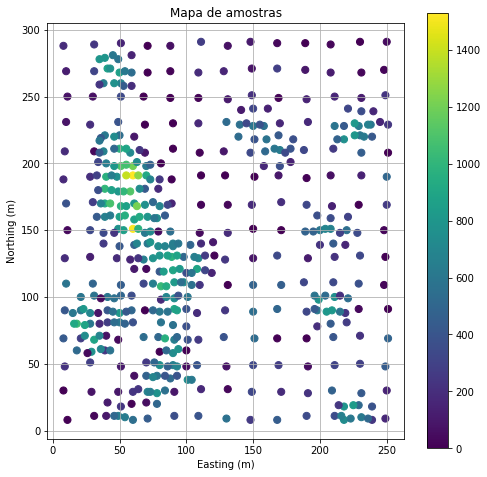

In [145]:
locmap(walker.X, walker.Y, walker.V)

In [146]:
def auto_grid(x, y, sx, sy):
    nx = int((x.max()-x.min())/sx)
    ny = int((y.max()-y.min())/sy)
    ox = x.min()
    oy = y.min()
    
    return {'ox':ox, 'oy':oy, 'nx':nx, 'ny':ny, 'sx':sx, 'sy':sy}

In [234]:
g = auto_grid(walker.X, walker.Y, 5, 5)

In [241]:
coords = add_coord(g)

In [242]:
coords

array([[  8.,   8.],
       [  8.,  13.],
       [  8.,  18.],
       ...,
       [243., 273.],
       [243., 278.],
       [243., 283.]])

In [236]:
from scipy.interpolate import Rbf

In [237]:
rbfi = Rbf(walker.X, 
           walker.Y, 
           np.zeros(len(walker.Y)), 
           walker.V, 
           function='multiquadric', 
           smooth=1.0)

In [238]:
results = rbfi(coords.T[0], coords.T[1], np.zeros(len(coords.T[0])))

In [243]:
def pixelplot(grid, values):
    values = values.reshape(grid['ny'],grid['nx'], order='F')
    plt.figure(figsize=(8,8))
    plt.imshow(values, origin='lower')
    plt.colorbar()
    plt.show()

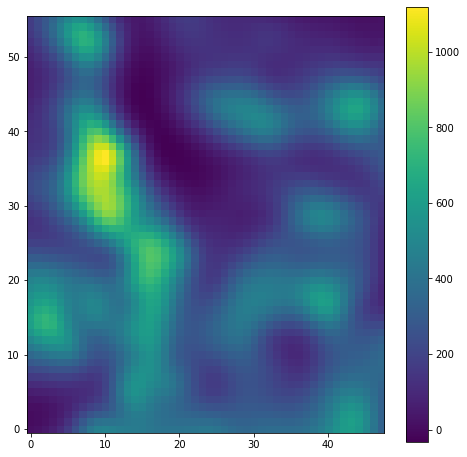

In [244]:
pixelplot(g, results)

In [254]:
walker.iloc[[50,80,10]]

,Id,X,Y,V,U,T
50,51.0,68.0,110.0,329.1,-999.0,2.0
80,81.0,110.0,109.0,237.6,-999.0,2.0
10,11.0,9.0,209.0,187.8,-999.0,2.0


In [258]:
walker

,Id,X,Y,V,U,T
0,1.0,11.0,8.0,0.0,NaN,2.0
1,2.0,8.0,30.0,0.0,NaN,2.0
2,3.0,9.0,48.0,224.4,NaN,2.0
3,4.0,8.0,69.0,434.4,NaN,2.0
4,5.0,9.0,90.0,412.1,NaN,2.0
...,...,...,...,...,...,...
465,466.0,214.0,19.0,242.5,15.6,2.0
466,467.0,245.0,231.0,161.2,26.1,2.0
467,468.0,233.0,220.0,626.0,959.7,2.0
468,469.0,226.0,221.0,800.1,1681.5,2.0


In [259]:
walker_iso = walker.dropna()

In [260]:
from scipy import stats

In [271]:
s, i, r, p, std = stats.linregress(walker_iso.V, walker_iso.U)

In [272]:
def y_reg(slope, intercept, x):
    y = slope * x + intercept
    return y

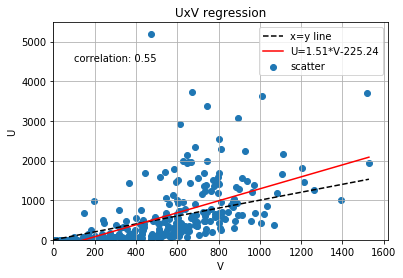

In [313]:
plt.plot([0, walker.V.max()], [0, walker.V.max()], '--', label='x=y line', color='black')
plt.scatter(walker_iso.V, walker_iso.U, label='scatter')
plt.plot(np.linspace(0,walker.V.max(), 1000), 
         y_reg(s, i, np.linspace(0,walker.V.max(), 1000)), 
         color='r', 
         label='U={}*V{}'.format(round(s,2),round(i,2)))
plt.legend()
plt.xlabel('V')
plt.ylabel('U')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('UxV regression')
plt.grid()
plt.annotate('correlation: {}'.format(round(r,2)), xy=(100,4500))
plt.show()

In [416]:
def df_from_geoeas(file):
    f = open(file)
    n = 0
    columns = []
    data = []
    for idx, line in enumerate(f):
        if idx == 1:
            n = int(line)
        if idx > 1 and idx <= (n+1):
            line = line.rstrip()
            columns.append(line)
        if idx > (n+1):
            arr = np.array(line.split()).astype(float)
            data.append(arr)
    
    df = pd.DataFrame(data=np.array(data), columns=columns)
    df.replace(-999, float('nan'), inplace=True)
    return df

In [417]:
fe_df = df_from_geoeas('data/Fe.dat')

In [418]:
def  geoeas_from_df(df, file):
    df.replace(float('nan'), -999, inplace=True)
    data_string = ''
    nome = 'df_export\n'
    data_string = data_string + nome
    n = str(len(df.columns)) + '\n'
    data_string = data_string + n
    for coluna in df.columns:
        data_string = data_string + coluna+'\n'
    num_data = df.to_string(header=False, index=False)
    data_string = data_string + num_data
    f = open(file, 'w')
    f.write(data_string)
    f.close()

In [419]:
geoeas_from_df(fe_df, 'ferro_fun_teste.dat')

In [420]:
program = 'kt3d/kt3d.exe'
parfile = 'kt3d/kt3d.par'

In [421]:
import subprocess
p = subprocess.Popen([program, parfile], stdout=subprocess.PIPE)
for line in p.stdout:    
    print(line.decode('utf-8'), end='')


 KT3D Version: 3.000

  data file = ../data/cluster.dat                     
  columns =            0           1           2           0           3
           0
  trimming limits =  -1.0000000E+21  1.0000000E+21
  kriging option =            0
  jackknife data file = xvk.dat                                 
  columns =            1           2           0           3           0
  debugging level =            3
  debugging file = kt3d.dbg                                
  output file = kt3d.out                                
  nx, xmn, xsiz =           50  0.5000000       1.000000    
  ny, ymn, ysiz =           50  0.5000000       1.000000    
  nz, zmn, zsiz =            1  0.5000000       1.000000    
  block discretization:           1           1           1
  ndmin,ndmax =            4           8
  max per octant =            0
  search radii =    20.00000       20.00000       20.00000    
  search anisotropy angles =   0.0000000E+00  0.0000000E+00  0.0000000E+00
  ktype, sk

In [422]:
parstring = '''
                  Parameters for KT3D
                  *******************

START OF PARAMETERS:
{file}              -file with data
0  {x}  {y}  {z}  {var}  0                 -   columns for DH,X,Y,Z,var,sec var
-1.0e21   1.0e21                 -   trimming limits
1                                -option: 0=grid, 1=cross, 2=jackknife
xvk.dat                          -file with jackknife data
1   2   0    3    0              -   columns for X,Y,Z,vr and sec var
3                                -debugging level: 0,1,2,3
kt3d.dbg                         -file for debugging output
kt3d.out                         -file for kriged output
50   0.5    1.0                  -nx,xmn,xsiz
50   0.5    1.0                  -ny,ymn,ysiz
1    0.5    1.0                  -nz,zmn,zsiz
1    1      1                    -x,y and z block discretization
{min}    {max}                           -min, max data for kriging
0                                -max per octant (0-> not used)
{range}  {range}  {range}                 -maximum search radii
 0.0   0.0   0.0                 -angles for search ellipsoid
1     2.302                      -0=SK,1=OK,2=non-st SK,3=exdrift
0 0 0 0 0 0 0 0 0                -drift: x,y,z,xx,yy,zz,xy,xz,zy
0                                -0, variable; 1, estimate trend
extdrift.dat                     -gridded file with drift/mean
4                                -  column number in gridded file
1    0.2                         -nst, nugget effect
1    0.8  0.0   0.0   0.0        -it,cc,ang1,ang2,ang3
         100.0  100.0  100.0        -a_hmax, a_hmin, a_vert

'''

map_dict = {
    'file':'C:/Users/Roberto Rolo/Documents/curso_python/Notebooks/data/Fe.dat',
    'x':'1',
    'y':'2',
    'z':'3',
    'var':'4',
    'min':'4',
    'max':'12',
    'range':'100'
}


formated_str = parstring.format(**map_dict)

In [423]:
f = open('kt3d/kt3d_novo_arquivo_par.par', 'w')
f.write(formated_str)
f.close()

In [424]:
parfile = 'kt3d/kt3d_novo_arquivo_par.par'

In [425]:
p = subprocess.Popen([program, parfile], stdout=subprocess.PIPE)
for line in p.stdout:    
    print(line.decode('utf-8'), end='')


 KT3D Version: 3.000

  data file = C:/Users/Roberto Rolo/Documents/curso_py
  columns =            0           1           2           3           4
           0
  trimming limits =  -1.0000000E+21  1.0000000E+21
  kriging option =            1
  jackknife data file = xvk.dat                                 
  columns =            1           2           0           3           0
  debugging level =            3
  debugging file = kt3d.dbg                                
  output file = kt3d.out                                
  nx, xmn, xsiz =           50  0.5000000       1.000000    
  ny, ymn, ysiz =           50  0.5000000       1.000000    
  nz, zmn, zsiz =            1  0.5000000       1.000000    
  block discretization:           1           1           1
  ndmin,ndmax =            4          12
  max per octant =            0
  search radii =    100.0000       100.0000       100.0000    
  search anisotropy angles =   0.0000000E+00  0.0000000E+00  0.0000000E+00
  ktype, sk

In [426]:
xval = df_from_geoeas('kt3d.out')

In [427]:
xval.head()

,X,Y,Z,True,Estimate,EstimationVariance,Error: est-true
0,1080.0,1027.9,506.20001,51.099998,46.650787,0.575080,-4.449211
1,1080.0,1021.1,494.50000,51.099998,46.395981,0.555523,-4.704018
2,1614.0,1030.7,375.00000,45.099998,44.250935,0.467548,-0.849064
3,1614.0,1023.2,362.10001,45.099998,44.075199,0.512882,-1.024799
4,1614.0,1005.3,331.10001,41.500000,45.978596,0.816945,4.478596


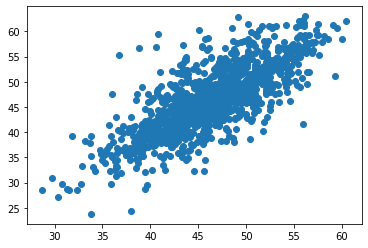

In [428]:
plt.scatter(xval['Estimate'], xval['True'])
plt.show()

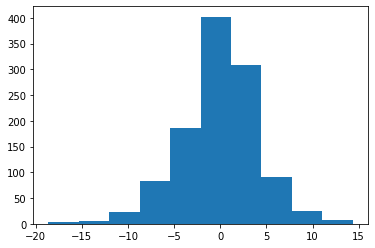

In [430]:
plt.hist(xval['Error: est-true'])
plt.show()

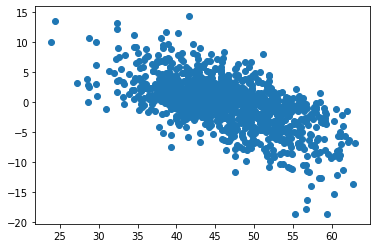

In [431]:
plt.scatter(xval['True'], xval['Error: est-true'])
plt.show()